In [1]:
import sympy
import math
import numpy as np
import matplotlib.pyplot as plt
## 3d imports >
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## Ray Tracing

##### Abstract:
Explore basic concepts of ray tracing algorith and implement a functional ray tracer. Explore different use cases and implementation of ray tracing.
##### Introduction:

##### Deliverables:
- Technical report
- Tutorial
- Scientific article
- Popular science article
- Multimedia product / explainer
- Code repo / library / framework / app

### 1.0 Geenral Notes
- Used to render images with computers.
- In the real world our eyes capture all of the rays in order to see. However, in computer graphics we don't have infinite computanional power, so we use only the rays that reach or hit our eyes directly or after rebounds.

"Given a set of 3D objects, shoot a ray from the eye through the
center of every pixel and see what it hits"


#### 1.1  Ray casting:

- Render a scene by shooting one ray per pixel.
- Ability to deal with non-planar surfaces and solids.

#### 1.2  Ray tracing:
Ray tracing is an improvement on ray casting.

- Introduces reflection, refraction and shadows.
- Reflections continue on in the mirror-reflection direction of shiny or reflective surfaces.
- Refraction is the ray which direction is into the object and can also exit it.
- Shadow is computed by creating shadow rays which originates from the intersection to all lights.

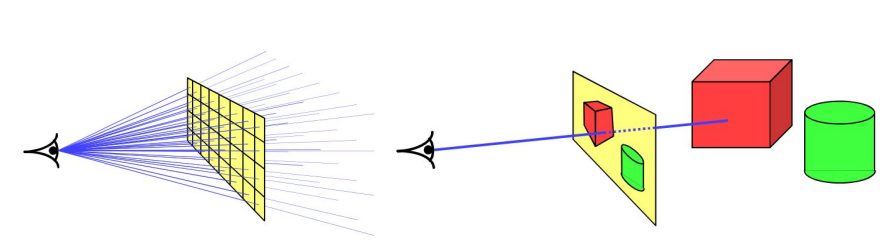

### 2.0 Algorithm

Main 5 sections of the algorithm:
1. Camera Ray casting
2. Ray-object intersection
3. Dealing with object transformation
4. Lighting calculations
5. Recursive ray tracing

Generally the algorithm of ray tracing is performed by **tracing a path from an imaginary eye** through each pixel in a virtual screen.
Take an initial point and a direction, given as a vector. The point and vecotr determine a ray.

1. Creating the rayes from our eye:
    Camera is positioned at the origin looking down at the **Z axis
   

#### 2.1 Pseudo descripitons:

> for ( each pixel of the screen )  
>>    Final color = 0;  
    Ray = ( starting point, direction )  
    Repeat
>>> for ( each object in the scene )
>>>> determine closest ray object/intersection
>>>
>>> if ( intersection exists )
>>>> for ( each light in the scene )
>>>>> if ( the light is not in shadow of another object )
>>>>>> add this light contribution to computed color
>>>>>
>>>>
>>>
>>> Final color = Final color + computed color * previous reflection factor   
>>> reflection factor = reflection factor * surface reflection property
>>> increment depth
>> until reflection factor is 0 or maximum depth is reached



------

> for (every pixel in the screen plane):
>>  Find the ray from the eye through the pixel’s center.   
>>>for (each object in the scen):
>>>>if (the ray hits the object ):
>>>>>if (the intersection is the nearest (so far) to the eye):  
Record the intersection point.  
Record the color of the object at that point.
>>>>
>>>
>Set the screen plane pixel to the nearest recorded color.color.

### 3.0 Test implementations

#### 3.1 Scene

Define a triangle with 3 coordinates $ \lbrace t_1, t_2, t_3 \rbrace $. Each coordinate corresponds to $ \lbrace x, y, z \rbrace $ in 3D.

(<Figure size 600x600 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

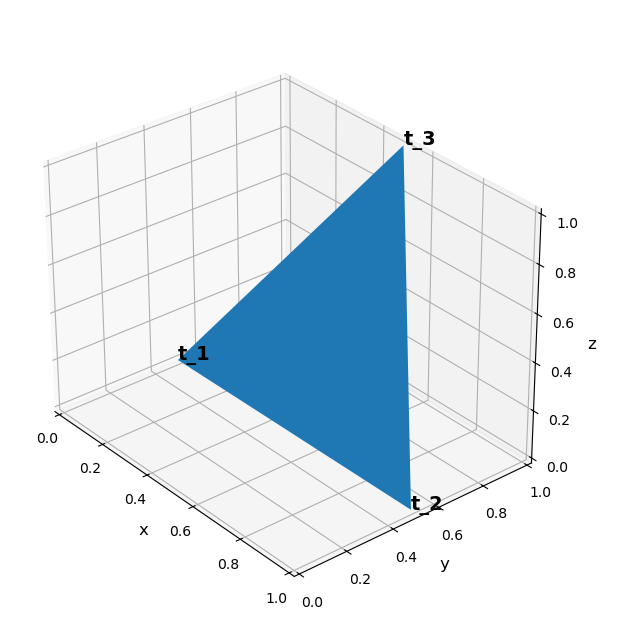

In [25]:
define_scene(30, -40)

Add point of view or camera to the scene

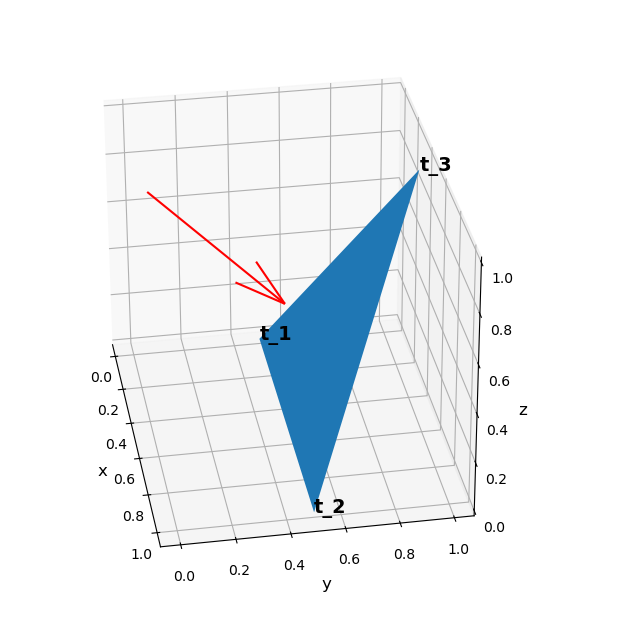

In [26]:
add_camera(30, -10)

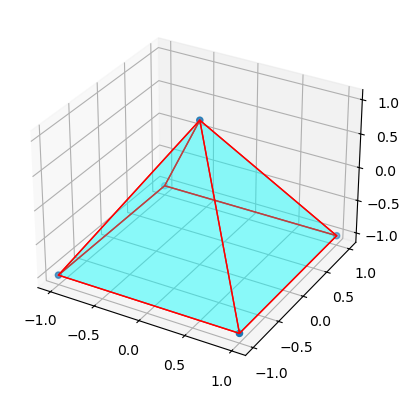

In [45]:
define_pyramid()

In [44]:
def define_scene (elev, azim):
    '''3.1 Scene: Defines a trianble and scene with 3 coordinates in the x, y, z axis.'''
    fig = plt.figure(figsize = (6, 6))
    
    ax = Axes3D(fig, auto_add_to_figure=False)
    
    fig.add_axes(ax)
    
    ## x = [0, 1, 1, 0]
    ## y = [0, 0, 1, 1]
    ## z = [0, 0.6, 0, 1]
    x = [0, 0.5, 1]
    y = [0.5, 1, 0.5]
    z = [0, 1, 0]
    
    verts = [list(zip(x, y, z))]
    
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.8, 1, 1]))
    ax.add_collection3d(Poly3DCollection(verts))
    
    ax.text(0, 0.5, 0, "t_1", color='black', fontsize=14, fontweight='bold')
    ax.text(1, 0.5, 0, "t_2", color='black', fontsize=14, fontweight='bold')
    ax.text(0.5, 1, 1, "t_3", color='black', fontsize=14, fontweight='bold')
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12) 
    ax.set_zlabel('z', fontsize=12)
    # set view point - elev, azim
    ax.view_init(elev, azim)
    
    return fig, ax
    plt.show()

def add_camera (elev, azim):
    '''Adds a camera or point of view to the scene'''
    soa = np.array([[0.5, 0, 1, 0, 0.5, -0.5]])
    X, Y, Z, U, V, W = zip(*soa)
    
    fig, ax = define_scene(elev, azim)
    
    ax.quiver(X, Y, Z, U, V, W, color='r')

    plt.show()

def define_pyramid ():
    '''Defines a pyramid in 3d'''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    v = np.array([[-1, -1, -1], [1, -1, -1], [1, 1, -1],  [-1, 1, -1], [0, 0, 1]])
    ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])
    
    verts = [ [v[0],v[1],v[4]], [v[0],v[3],v[4]],
     [v[2],v[1],v[4]], [v[2],v[3],v[4]], [v[0],v[1],v[2],v[3]]]

    # plot sides
    ax.add_collection3d(Poly3DCollection(verts, 
     facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
    
    plt.show()

$$ |V| $$

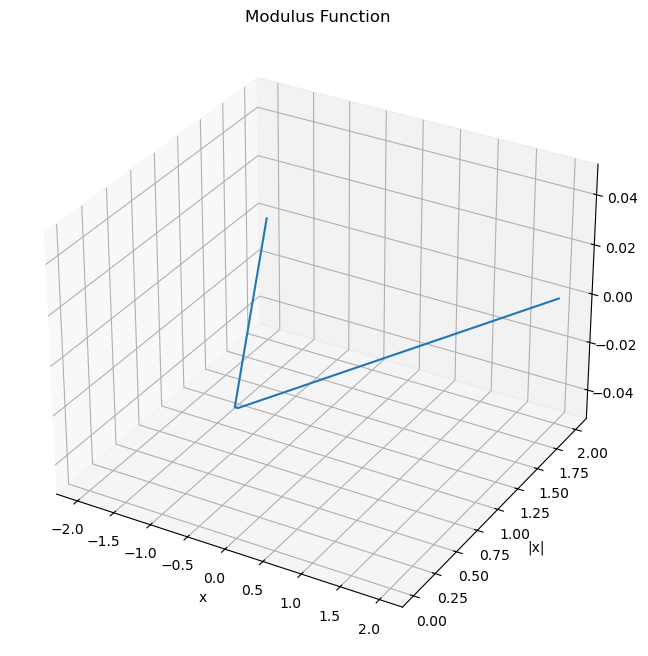

In [105]:
x = np.linspace(-2, 2, 100)
y = abs(x)
 
fig = plt.figure(figsize = (8, 8))
plt.axes(projection='3d')

plt.plot(x, y)
plt.title('Modulus Function')
plt.xlabel('x')
plt.ylabel('|x|')
plt.grid(True)
plt.show()

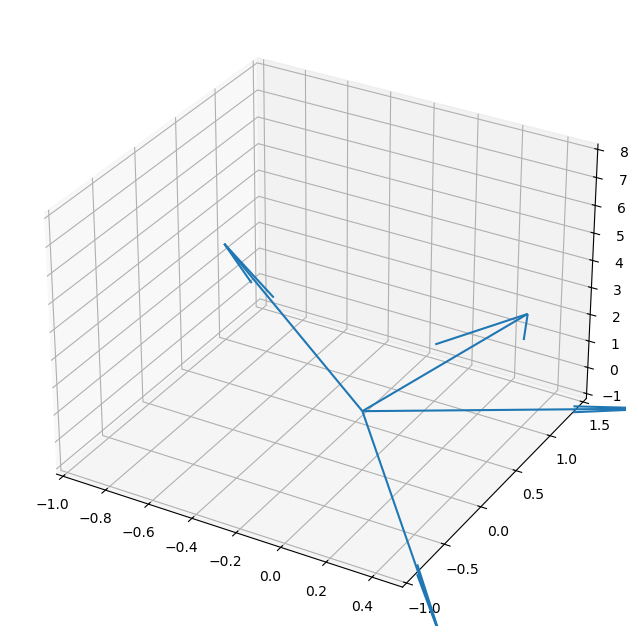

In [38]:
soa = np.array([
    [0, 0, 1, 1, -2, 0],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 1, -1, 1, 1.5],
    [0, 0, 1, 0.5, 0.7, 3]])

X, Y, Z, U, V, W = zip(*soa)
# X, Y, Z base arrow location
# U, V, W arrow vectors

fig = plt.figure(figsize = (8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])

plt.show()

Sources and Links:

https://inst.eecs.berkeley.edu/~cs294-13/fa09/lectures/scribe-lecture1.pdf

https://math.hws.edu/eck/cs424/downloads/graphicsbook-linked.pdf#page=151&zoom=100,96,393

https://www.cl.cam.ac.uk/teaching/1718/AdvGraph/1.%20Ray%20Tracing%20-%20All%20the%20Maths.pdf

https://blog.scottlogic.com/2020/03/10/raytracer-how-to.html